<a href="https://colab.research.google.com/github/AlyssaPh/-MAT-421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numerical Error and Instability**

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

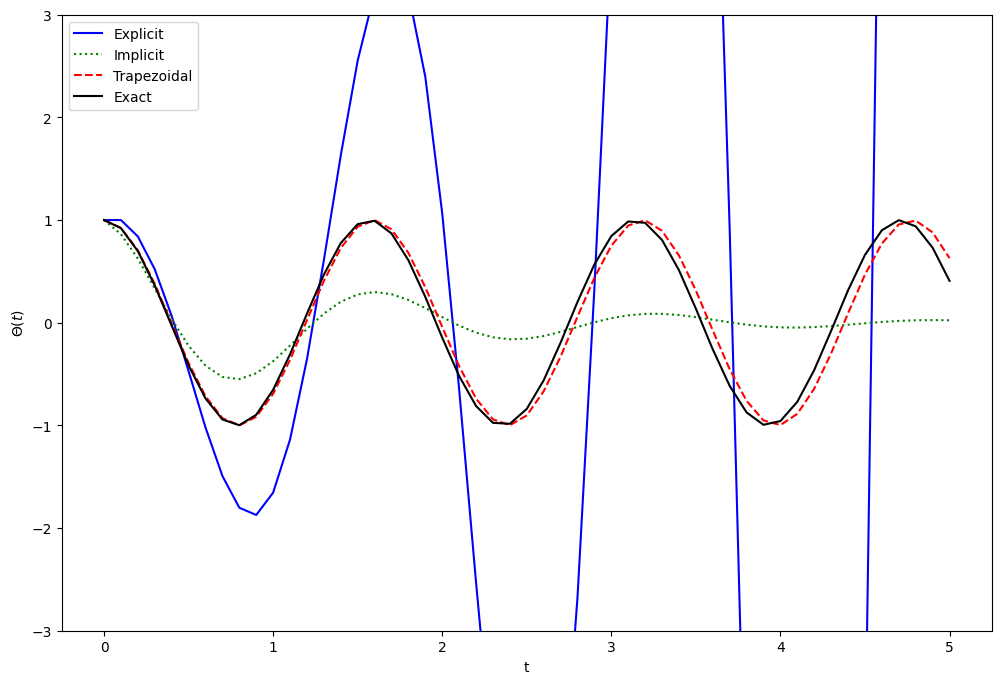

In [5]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Predictor-Corrector and Runge Kutta Methods**


Predictor-Corrector Methods

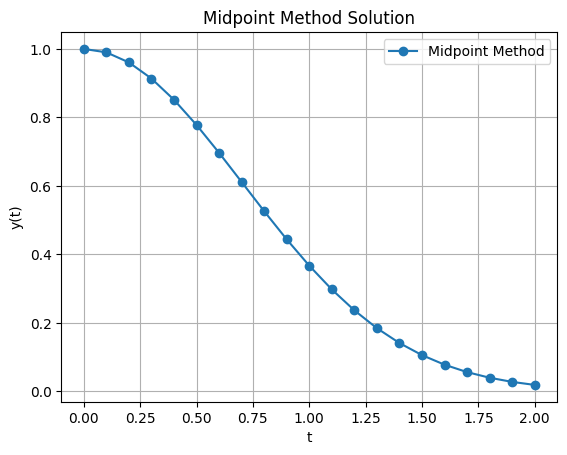

In [6]:
def midpoint_method(f, t0, y0, h, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
        # Predictor step (Euler half-step)
        k1 = f(t[i], y[i])
        y_pred = y[i] + (h / 2) * k1

        # Corrector step (Full step using midpoint)
        k2 = f(t[i] + h / 2, y_pred)
        y[i + 1] = y[i] + h * k2

    return t, y

# Example usage:
def f(t, y):
    return -2 * t * y  # dy/dt = -2ty (example ODE)

t0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1
t_end = 2

t, y = midpoint_method(f, t0, y0, h, t_end)

# Plotting
plt.plot(t, y, 'o-', label='Midpoint Method')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Midpoint Method Solution')
plt.legend()
plt.grid()
plt.show()

Second-Order Runge-Kutta

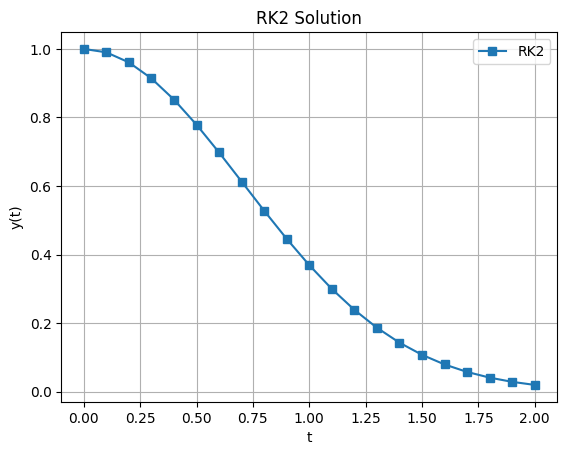

In [7]:
def rk2(f, t0, y0, h, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h / 2) * (k1 + k2)

    return t, y

# Example usage:
t, y = rk2(f, t0, y0, h, t_end)

# Plotting
plt.plot(t, y, 's-', label='RK2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('RK2 Solution')
plt.legend()
plt.grid()
plt.show()

Second order Runge Kutta method

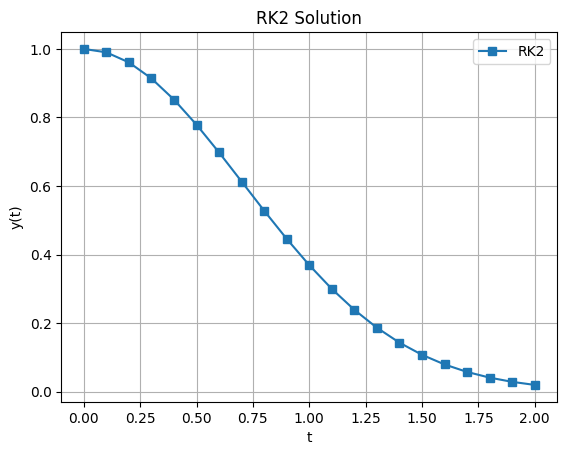

In [9]:
def rk2(f, t0, y0, h, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h / 2) * (k1 + k2)

    return t, y

# Example usage:
t, y = rk2(f, t0, y0, h, t_end)

# Plotting
plt.plot(t, y, 's-', label='RK2')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('RK2 Solution')
plt.legend()
plt.grid()
plt.show()

Fourth-order Runge Kutta method

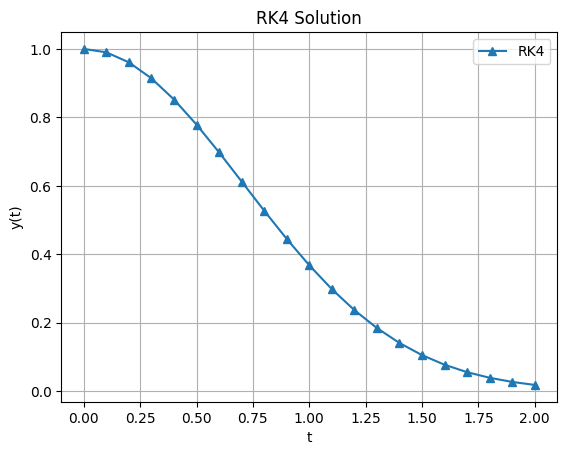

In [10]:
def rk4(f, t0, y0, h, t_end):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t) - 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h / 2, y[i] + (h / 2) * k1)
        k3 = f(t[i] + h / 2, y[i] + (h / 2) * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t, y

# Example usage:
t, y = rk4(f, t0, y0, h, t_end)

# Plotting
plt.plot(t, y, '^-', label='RK4')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('RK4 Solution')
plt.legend()
plt.grid()
plt.show()

**Python ODE Solvers**

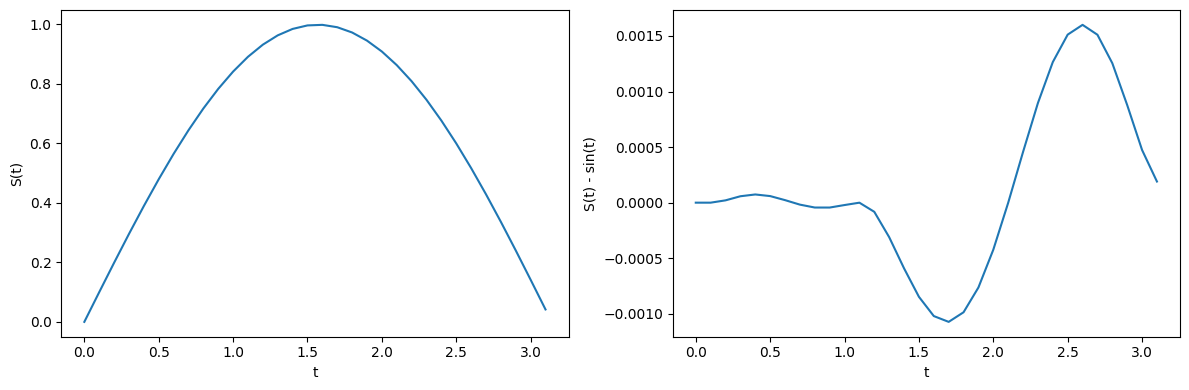

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()